In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# import plotly
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get the csv data here and print head
df = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [3]:
# Print Summary
print ('Shape             --------->', df.shape)
print ('Each Column and data type and its count','\n')
print (df.info())

Shape             ---------> (9017, 33)
Each Column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 

df = df.drop(['STATE/UT'],axis = 1)

In [4]:
# Data Frame Statistics
df.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,...,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000
mean,2006.629034,89.28535,78.069646,9.895531,53.041366,0.005767,53.035599,79.152046,58.535433,20.616613,...,25.219918,747.893091,20.228901,100.511257,27.515582,194.122435,0.197849,222.216702,2174.299434,5310.115116
std,3.463623,327.27503,303.446020,59.521657,190.741450,0.115223,190.725474,317.630964,246.937464,88.586415,...,98.880282,3024.106467,96.970466,394.059436,167.237522,831.986594,2.415039,936.002540,7988.438462,18524.381119
min,2001.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.00000,10.000000,0.000000,8.000000,0.000000,8.000000,10.000000,6.000000,1.000000,...,2.000000,43.000000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,265.000000,853.000000
50%,2007.000000,38.00000,28.000000,2.000000,20.000000,0.000000,20.000000,25.000000,18.000000,5.000000,...,8.000000,199.000000,5.000000,31.000000,2.000000,47.000000,0.000000,68.000000,745.000000,2096.000000
75%,2010.000000,66.00000,56.000000,6.000000,41.000000,0.000000,41.000000,56.000000,42.000000,13.000000,...,20.000000,529.000000,16.000000,76.000000,13.000000,135.000000,0.000000,177.000000,1608.000000,3972.000000
max,2012.000000,7601.00000,7964.000000,1616.000000,3425.000000,5.000000,3425.000000,8878.000000,7910.000000,2416.000000,...,2830.000000,56768.000000,2322.000000,7118.000000,4970.000000,19865.000000,83.000000,16076.000000,124176.000000,220335.000000


In [5]:
df.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [6]:
df.MURDER.value_counts()

0       185
1       151
4       145
3       144
6       141
       ... 
436       1
3471      1
1013      1
1033      1
521       1
Name: MURDER, Length: 477, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

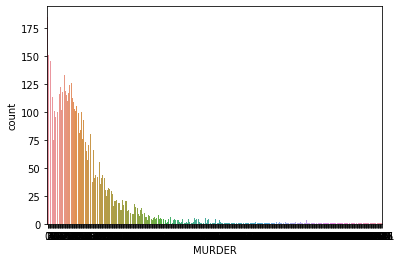

In [7]:
# Plot each class freequency

sns.countplot(x = 'MURDER' ,data = df)
plt.show

In [8]:
df.shape

(9017, 33)

In [9]:
g= pd.DataFrame(df.groupby(['YEAR'])['RAPE'].sum().reset_index())
g

,YEAR,RAPE
0,2001,32150
1,2002,32746
2,2003,31694
3,2004,36466
4,2005,36718
5,2006,38696
6,2007,41474
7,2008,42934
8,2009,42794
9,2010,44344


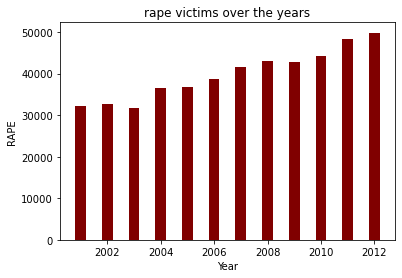

In [10]:
plt.bar(g['YEAR'], g['RAPE'], color ='maroon',
        width = 0.4)
plt.xlabel("Year")
plt.ylabel("RAPE")
plt.title("rape victims over the years")
plt.show()

In [11]:
df['kid_abd_victims']= df['KIDNAPPING & ABDUCTION']+df['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS'] + df['KIDNAPPING AND ABDUCTION OF OTHERS']
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,kid_abd_victims
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,92
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,106
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,118
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,50
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,0,1,0,1,0,0,32,60,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,0,1,0,1,0,0,32,60,0
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,186,0,2,0,1,0,44,392,787,4
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,632,0,7,2,5,0,219,1668,3494,34


In [12]:
g1= pd.DataFrame(df.groupby(['YEAR'])['kid_abd_victims'].sum().reset_index())
g1

,YEAR,kid_abd_victims
0,2001,89948
1,2002,87400
2,2003,79968
3,2004,93308
4,2005,91328
5,2006,95964
6,2007,110244
7,2008,121044
8,2009,135440
9,2010,153760


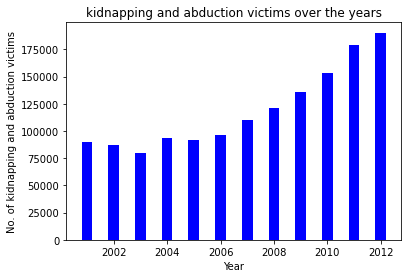

In [13]:
plt.bar(g1['YEAR'], g1['kid_abd_victims'], color ='b',
        width = 0.4)
plt.xlabel("Year")
plt.ylabel("No. of kidnapping and abduction victims")
plt.title("kidnapping and abduction victims over the years")
plt.show()

In [14]:
df['married_women_victims']= df['DOWRY DEATHS']+df['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'] + df['INSULT TO MODESTY OF WOMEN']+df['CRUELTY BY HUSBAND OR HIS RELATIVES']
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,kid_abd_victims,married_women_victims
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,16,149,34,175,0,181,1518,4154,92,374
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,7,118,24,154,0,270,754,4125,106,303
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,14,112,83,186,0,404,1262,5818,118,395
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,17,126,38,57,0,233,1181,3140,50,238
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,12,109,58,247,0,431,2313,6507,98,426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,0,1,0,1,0,0,32,60,0,2
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,0,1,0,1,0,0,32,60,0,2
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,0,2,0,1,0,44,392,787,4,3
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,0,7,2,5,0,219,1668,3494,34,14


In [15]:
g2= pd.DataFrame(df.groupby(['YEAR'])['married_women_victims'].sum().reset_index())
g2

,YEAR,married_women_victims
0,2001,199782
1,2002,200314
2,2003,204350
3,2004,219430
4,2005,218530
5,2006,234658
6,2007,267414
7,2008,284286
8,2009,295298
9,2010,306012


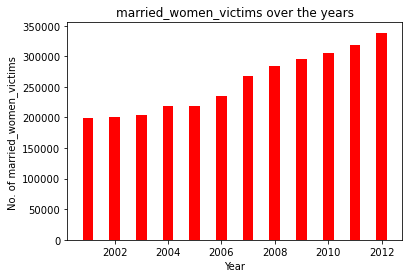

In [16]:
plt.bar(g2['YEAR'], g2['married_women_victims'], color ='r',
        width = 0.4)
plt.xlabel("Year")
plt.ylabel("No. of married_women_victims ")
plt.title("married_women_victims over the years")
plt.show()

In [17]:
df['murder_cases']= df['MURDER']+df['ATTEMPT TO MURDER'] + df['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER']
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,kid_abd_victims,married_women_victims,murder_cases
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,149,34,175,0,181,1518,4154,92,374,178
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,118,24,154,0,270,754,4125,106,303,277
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,112,83,186,0,404,1262,5818,118,395,160
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,126,38,57,0,233,1181,3140,50,238,134
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,109,58,247,0,431,2313,6507,98,426,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,1,0,1,0,0,32,60,0,2,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,1,0,1,0,0,32,60,0,2,0
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,2,0,1,0,44,392,787,4,3,13
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,7,2,5,0,219,1668,3494,34,14,55


In [18]:
g3= pd.DataFrame(df.groupby(['YEAR'])['murder_cases'].sum().reset_index())
g3

,YEAR,murder_cases
0,2001,142184
1,2002,138588
2,2003,125374
3,2004,130866
4,2005,128656
5,2006,126492
6,2007,126726
7,2008,130454
8,2009,130674
9,2010,133076


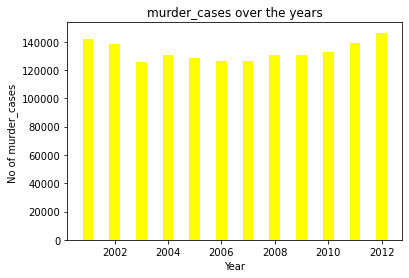

In [19]:
plt.bar(g3['YEAR'], g3['murder_cases'], color ='yellow',
        width = 0.4)
plt.xlabel("Year")
plt.ylabel("No of murder_cases ")
plt.title("murder_cases over the years")
plt.show()

In [20]:
df['theft_cases']= df['DACOITY']+df['PREPARATION AND ASSEMBLY FOR DACOITY'] + df['ROBBERY']+ df['BURGLARY'] +df['THEFT'] + df['AUTO THEFT'] +df['OTHER THEFT']
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,kid_abd_victims,married_women_victims,murder_cases,theft_cases
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,34,175,0,181,1518,4154,92,374,178,646
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,24,154,0,270,754,4125,106,303,277,947
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,83,186,0,404,1262,5818,118,395,160,1701
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,38,57,0,233,1181,3140,50,238,134,449
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,58,247,0,431,2313,6507,98,426,150,2508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,0,1,0,0,32,60,0,2,0,17
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,0,1,0,0,32,60,0,2,0,17
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,0,1,0,44,392,787,4,3,13,187
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,2,5,0,219,1668,3494,34,14,55,1242


In [21]:
g4= pd.DataFrame(df.groupby(['YEAR'])['theft_cases'].sum().reset_index())
g4

,YEAR,theft_cases
0,2001,1268914
1,2002,1236182
2,2003,1216836
3,2004,1329378
4,2005,1323956
5,2006,1333412
6,2007,1376448
7,2008,1511066
8,2009,1540610
9,2010,1562338


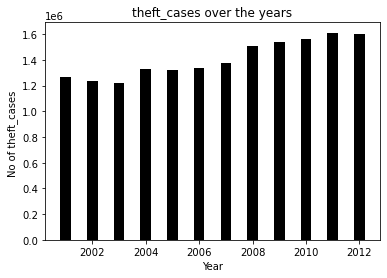

In [22]:
plt.bar(g4['YEAR'], g4['theft_cases'], color ='black',
        width = 0.4)
plt.xlabel("Year")
plt.ylabel("No of theft_cases ")
plt.title("theft_cases over the years")
plt.show()

In [23]:
df.corr()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,kid_abd_victims,married_women_victims,murder_cases,theft_cases
YEAR,1.000000,-0.013119,-0.001062,-0.004720,0.029702,-0.000197,0.029705,0.060192,0.074188,0.009021,...,-0.010803,0.053751,-0.017585,0.042236,0.020397,0.019805,0.060192,0.037520,-0.007292,0.015546
MURDER,-0.013119,1.000000,0.958120,0.781316,0.813854,0.150549,0.813831,0.835742,0.786340,0.804646,...,0.665953,0.710620,0.316327,0.795780,0.739604,0.846449,0.835742,0.810559,0.989611,0.821388
ATTEMPT TO MURDER,-0.001062,0.958120,1.000000,0.759359,0.778747,0.124546,0.778737,0.829043,0.783605,0.788250,...,0.614262,0.660295,0.306048,0.766365,0.759125,0.831710,0.829043,0.768198,0.986179,0.760987
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,-0.004720,0.781316,0.759359,1.000000,0.557073,0.073364,0.557076,0.737054,0.733246,0.598798,...,0.541452,0.551058,0.164427,0.508449,0.437657,0.519959,0.737054,0.602970,0.812593,0.506867
RAPE,0.029702,0.813854,0.778747,0.557073,1.000000,0.138948,1.000000,0.743485,0.728700,0.634529,...,0.498080,0.772843,0.256228,0.722206,0.793902,0.858241,0.743485,0.865106,0.797952,0.801118
CUSTODIAL RAPE,-0.000197,0.150549,0.124546,0.073364,0.138948,1.000000,0.138355,0.141543,0.130877,0.142684,...,0.068289,0.102754,0.024199,0.123451,0.106990,0.126149,0.141543,0.110282,0.136160,0.123055
OTHER RAPE,0.029705,0.813831,0.778737,0.557076,1.000000,0.138355,1.000000,0.743462,0.728682,0.634496,...,0.498080,0.772846,0.256235,0.722192,0.793904,0.858237,0.743462,0.865112,0.797936,0.801110
KIDNAPPING & ABDUCTION,0.060192,0.835742,0.829043,0.737054,0.743485,0.141543,0.743462,1.000000,0.981832,0.848661,...,0.460161,0.753506,0.242141,0.720095,0.661941,0.751826,1.000000,0.767045,0.847302,0.733184
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,0.074188,0.786340,0.783605,0.733246,0.728700,0.130877,0.728682,0.981832,1.000000,0.732876,...,0.439617,0.758667,0.154434,0.722735,0.644533,0.727661,0.981832,0.763678,0.802353,0.703003
KIDNAPPING AND ABDUCTION OF OTHERS,0.009021,0.804646,0.788250,0.598798,0.634529,0.142684,0.634496,0.848661,0.732876,1.000000,...,0.424483,0.586924,0.437718,0.567288,0.576764,0.667329,0.848661,0.621502,0.801457,0.669223


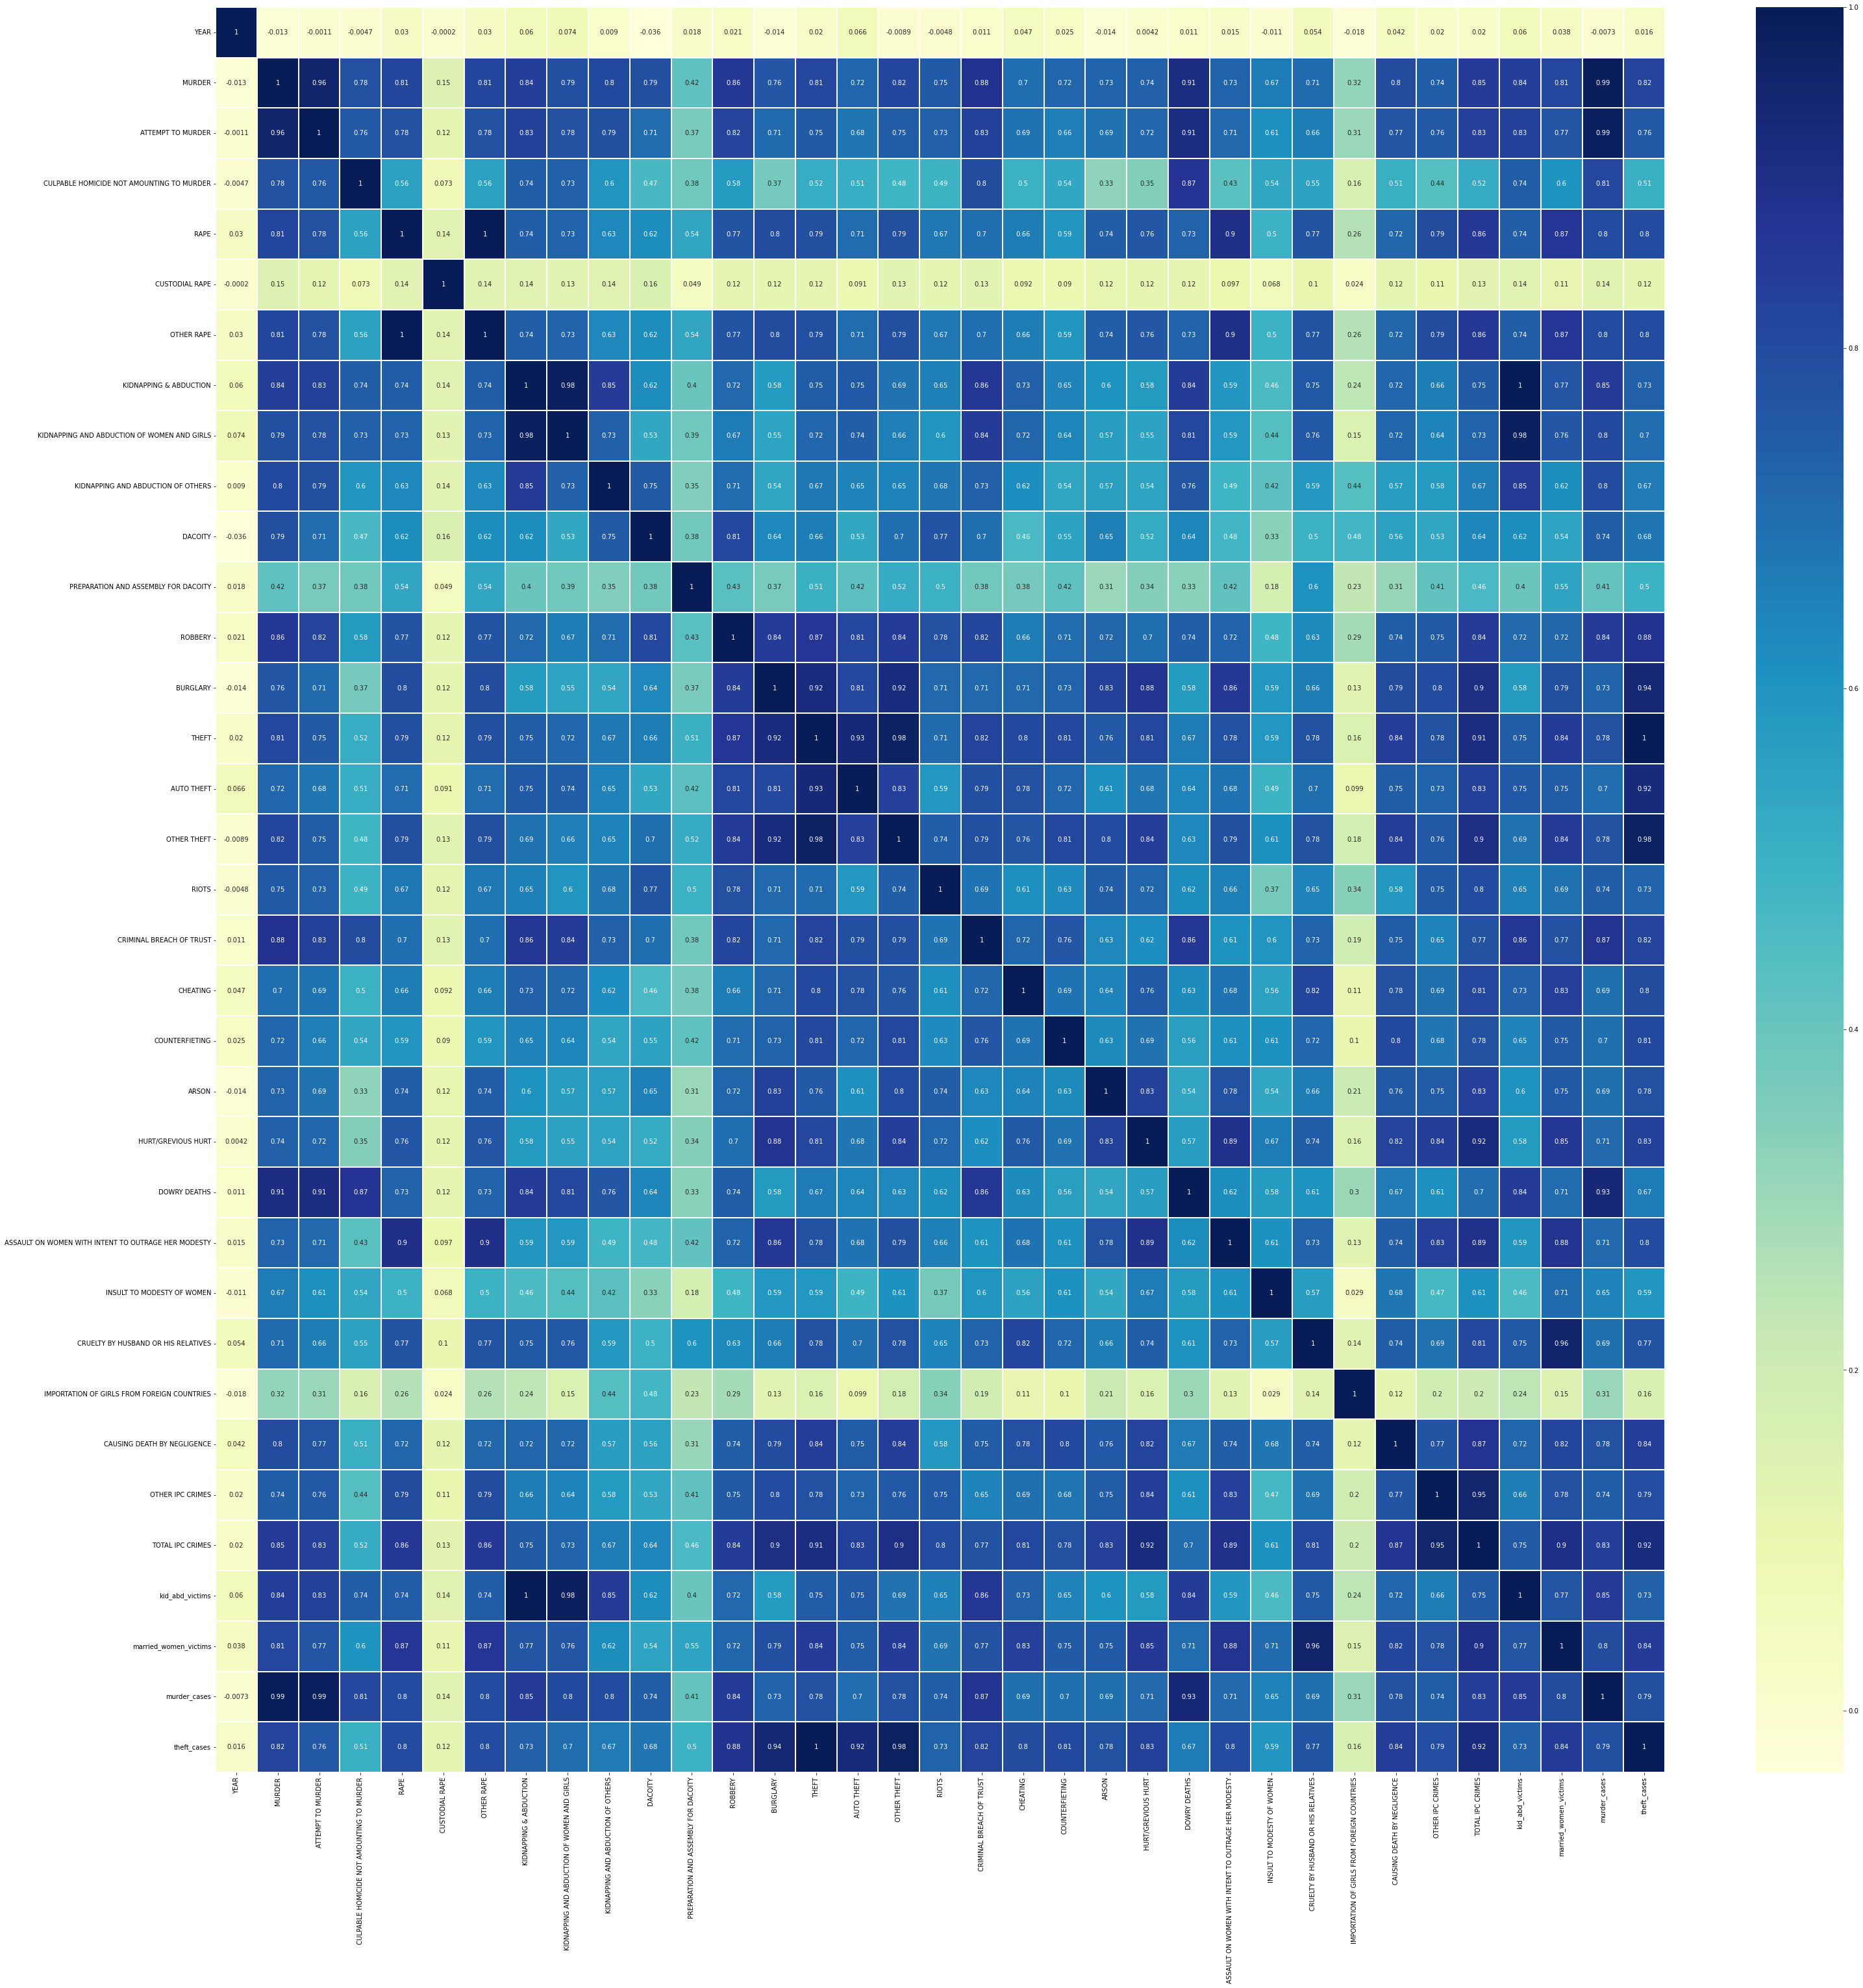

In [24]:
fig, ax = plt.subplots(figsize=(50,50))         # Sample figsize in inches
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu",linewidths=2,annot=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 37 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

In [26]:
df=df.drop([ 'STATE/UT','DISTRICT','YEAR','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','INSULT TO MODESTY OF WOMEN','DOWRY DEATHS','PREPARATION AND ASSEMBLY FOR DACOITY','DACOITY','KIDNAPPING AND ABDUCTION OF OTHERS','CUSTODIAL RAPE','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER','RAPE','kid_abd_victims','married_women_victims','murder_cases','theft_cases','OTHER IPC CRIMES','TOTAL IPC CRIMES','AUTO THEFT','OTHER THEFT'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 17 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   MURDER                                               9017 non-null   int64
 1   ATTEMPT TO MURDER                                    9017 non-null   int64
 2   OTHER RAPE                                           9017 non-null   int64
 3   KIDNAPPING & ABDUCTION                               9017 non-null   int64
 4   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS          9017 non-null   int64
 5   ROBBERY                                              9017 non-null   int64
 6   BURGLARY                                             9017 non-null   int64
 7   THEFT                                                9017 non-null   int64
 8   RIOTS                                                9017 non-null   int64
 9   CRIMINAL

In [27]:
df_train_y = df.iloc[:,8].values
df_train_y

array([ 78, 168, 156, ...,  17, 109, 126], dtype=int64)

In [28]:
ind=[]
for i in range(18):
    if i != 8:
        ind.append(i)

In [29]:
df_train_x = df.iloc[:,].values
df_train_x

array([[101,  60,  50, ..., 149, 175, 181],
       [151, 125,  23, ..., 118, 154, 270],
       [101,  57,  27, ..., 112, 186, 404],
       ...,
       [  5,   6,   6, ...,   2,   1,  44],
       [ 24,  21,   7, ...,   7,   5, 219],
       [ 29,  27,  13, ...,   9,   6, 263]], dtype=int64)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
ipc_train_x, ipc_test_x, ipc_train_y, ipc_test_y = train_test_split(df_train_x, df_train_y, test_size = 0.2, random_state=42)


In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
neigh = KNeighborsRegressor(n_neighbors=3)

In [34]:
neigh.fit(ipc_train_x, ipc_train_y)

KNeighborsRegressor(n_neighbors=3)

In [35]:
pred_y=neigh.predict(ipc_test_x)
pred_y

array([ 14.66666667,  87.66666667,  48.        , ..., 101.66666667,
       101.33333333, 484.33333333])

In [36]:
from sklearn.metrics import r2_score
knn3=r2_score(ipc_test_y,pred_y)
knn3

0.9760125366258676

In [37]:
neigh1 = KNeighborsRegressor(n_neighbors=5)

In [38]:
neigh1.fit(ipc_train_x, ipc_train_y)

KNeighborsRegressor()

In [39]:
pred_y1=neigh1.predict(ipc_test_x)

In [40]:
knn5=r2_score(ipc_test_y,pred_y1)
knn5

0.9688444701589348

In [41]:
neigh2 = KNeighborsRegressor(n_neighbors=2)
neigh2.fit(ipc_train_x, ipc_train_y)
pred_y2=neigh2.predict(ipc_test_x)
knn2=r2_score(ipc_test_y,pred_y2)
knn2

0.9791526722898697

In [42]:
from sklearn.tree import DecisionTreeRegressor 

In [43]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 42) 
  
# fit the regressor with X and Y data
regressor.fit(ipc_train_x, ipc_train_y)

DecisionTreeRegressor(random_state=42)

In [44]:
y_pred_dtr = regressor.predict(ipc_test_x)

In [45]:
dtr=r2_score(ipc_test_y,y_pred_dtr)
dtr

0.9996709411233471

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
regressor1 = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [48]:
regressor1.fit(ipc_train_x, ipc_train_y)

RandomForestRegressor(random_state=42)

In [49]:
y_pred_rfr = regressor1.predict(ipc_test_x)

In [50]:
rfr=r2_score(ipc_test_y,y_pred_rfr)
rfr

0.9996922331857778

In [51]:
labels=['knn2','knn3','knn5','ID3_reg','random_forest_reg']
scores = [knn2*100,knn3*100,knn5*100,dtr*100,rfr*100]

In [52]:
scores

[97.91526722898696,
 97.60125366258676,
 96.88444701589349,
 99.9670941123347,
 99.96922331857778]

In [53]:
import math

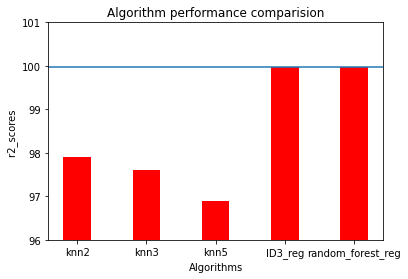

In [54]:
plt.bar(labels, scores, color ='r',
        width = 0.4)
low = min(scores)
high = max(scores)
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+1)])
plt.axhline(y=max(scores))
plt.xlabel("Algorithms")
plt.ylabel("r2_scores ")
plt.title("Algorithm performance comparision")
plt.show()